# WSDM - KKBox's Music Recommendation Challenge  
#### Autores: Cristian Osorio, Jefry Cardona

## Descripción
No hace muchos años, era inconcebible que la misma persona escuchara a los Beatles, Vivaldi y Lady Gaga en su viaje matutino. Pero, los días de gloria de los DJs de radio han pasado, y los locutores y programadores musicales en la radio han sido reemplazados por algoritmos de personalización y servicios de streaming ilimitados.

Mientras que el público escucha todo tipo de música, los algoritmos siguen luchando en áreas clave. Sin suficientes datos históricos, ¿cómo sabría un algoritmo si a los oyentes les gustará una nueva canción o un nuevo artista? Y, ¿cómo sabría qué canciones recomendar a los nuevos usuarios?

El conjunto de datos es de KKBOX, el servicio de transmisión de música streaming líder en Asia, que contiene la biblioteca de música pop asiática más completa del mundo con más de 30 millones de pistas.

El trabajo para este proyecto es predecir la probabilidad de que un usuario escuche una canción repetedimante después de que se haya activado el primer evento de escucha observable dentro de un lapso de tiempo. Si hay eventos de escucha recurrentes que se activan dentro de un mes después del primer evento de escucha observable del usuario, su objetivo está marcado con un 1, y con un 0 en el conjunto de entrenamiento. La misma regla se aplica al conjunto de pruebas.

KKBOX proporciona un conjunto de datos de entrenamiento que consiste en información del primer evento de escucha observable para cada par de canciones de usuario único dentro de una duración de tiempo específica. También se proporcionan los metadatos de cada usuario y par de canciones único.

## Diccionario de datos

En principio el dataset se encuentra dividido en 6 archivos de tipo csv los cuales son: train, test, sample_submission, songs, members y song_extra_info. Cada uno contiene una serie de columnas de datos que se explicarán a continuación:

### train.csv

* *msno*: id del usuario
* *song_id*: id de la canción.
* *source_system_tab*: el nombre de la pestaña en la que se ha lannzado el evento. Las pestañas de sistema se utilizan para categorizar las funciones de las aplicaciones móviles de KKBOX. Por ejemplo, la pestaña ```my library``` contiene funciones para manipular el almacenamiento local, y la pestañas ```search``` contiene funciones relacionadas con la búsqueda.
* *source_screen_name*: nombre de la pantalla que el usuario está viendo.
* *source_type*: punto de entrada en el que el usuario reproduce por primera vez música en aplicaciones móviles. Un punto de entrada podría ser un álbum, una lista de reproducción en línea, una canción... etc.
* *target*: es la variable objetivo, ```target=1``` significa que hay eventos de escucha recurrentes que se activan en el plazo de un mes después del primer evento de escucha observable del usuario, ```target=1``` en caso contrario.

### test.csv

* *id*: será usado para submission.
* *msno*: id del usuario.
* *song_id*: id de la canción.
* *source_system_tab*: el nombre de la pestaña en la que se ha lannzado el evento. Las pestañas de sistema se utilizan para categorizar las funciones de las aplicaciones móviles de KKBOX. Por ejemplo, la pestaña ```my library``` contiene funciones para manipular el almacenamiento local, y la pestañas ```search``` contiene funciones relacionadas con la búsqueda.
* *source_screen_name*: nombre de la pantalla que el usuario está viendo.
* *source_type*: punto de entrada en el que el usuario reproduce por primera vez música en aplicaciones móviles. Un punto de entrada podría ser un álbum, una lista de reproducción en línea, una canción... etc.

### sample_submission.csv

Formato del archivo en la que se espera se envíen los resultados a la competencia.

* *id*: mismo id del test.csv.
* *target*: es la variable objetivo. ```target=1``` significa que hay eventos de escucha recurrentes que se activan dentro de un mes después del primer evento de escucha observable del usuario, ```target=0``` en caso contrario.

### songs.csv

* *song_id*: id de la canción.
* *song_length*: duración de la canción en milisegundos (ms).
* *genre_ids*: categoría de genero. Algunas canciones tienen multiples generos y estan separados mediante "|".
* *artist_name*: nombre del artista.
* *composer*: compositor.
* *lyricist*: letrista.
* *language*: lenguaje.

### members.csv

* *msno*: id del usuario.
* *city*: ciudad del miembro.
* *bd*: años de edad del miembro.
* *gender*: género.
* *registered_via*: método de registro.
* *registration_init_time*: fecha de registro en formato ```%Y%m%d```.
* *expiration_date*: fecha de expiración en formato ```%Y%m%d```.

### song_extra_info.csv

* *song_id*: id de la canción.
* *song_name*: nnombre de la canción.
* *isrc*: (International Standart Recording Code), teóricamente puede ser usado como un identificador de una canción. Sin embargo, cabe señalar que los ISRC generados por los proveedores no han sido verificados oficialmente; por lo tanto, la información del ISRC, como el código de país y el año de referencia, puede ser engañosa o incorrecta. Múltiples canciones podrían compartir un ISRC ya que una sola grabación podría volver a publicarse varias veces.

## Análisis e identificación de problemas de los datos

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
import seaborn as sns
import csv
from kmodes.kmodes import KModes

#### Cargaremos los datos en memoria y los mostraremos resumidos para encontrar problemas iniciales.

In [2]:
train = pd.read_csv(r'D:\2018-2\Data-Mining\dataset proyecto\train.csv', encoding='utf-8', sep=',')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [4]:
train.describe(include="all")

,msno,song_id,source_system_tab,source_screen_name,source_type,target
count,7377418,7377418,7352569,6962614,7355879,7.377418e+06
unique,30755,359966,8,20,12,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN
freq,5819,13973,3684730,3228202,2261399,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


In [5]:
train.dtypes

msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                 int64
dtype: object

In [6]:
test = pd.read_csv(r'D:\2018-2\Data-Mining\dataset proyecto\test.csv', encoding='utf-8', sep=',')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [8]:
test.describe(include="all")

,id,msno,song_id,source_system_tab,source_screen_name,source_type
count,2.556790e+06,2556790,2556790,2548348,2393907,2549493
unique,NaN,25131,224753,8,22,12
top,NaN,KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=,ZcKgNis1AP1LA0sdtIddrtk7P04iiJzJrXvwXdT/X3Q=,my library,Local playlist more,online-playlist
freq,NaN,2489,8320,1019492,845115,774532
mean,1.278394e+06,NaN,NaN,NaN,NaN,NaN
std,7.380818e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,6.391972e+05,NaN,NaN,NaN,NaN,NaN
50%,1.278394e+06,NaN,NaN,NaN,NaN,NaN
75%,1.917592e+06,NaN,NaN,NaN,NaN,NaN


In [9]:
test.dtypes

id                     int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtype: object

In [10]:
sample_sub = pd.read_csv(r'D:\2018-2\Data-Mining\dataset proyecto\sample_submission.csv', encoding='utf-8', sep=',')
sample_sub.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [11]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
id        int64
target    float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB


In [12]:
sample_sub.describe(include="all")

,id,target
count,2.556790e+06,2556790.0
mean,1.278394e+06,0.5
std,7.380818e+05,0.0
min,0.000000e+00,0.5
25%,6.391972e+05,0.5
50%,1.278394e+06,0.5
75%,1.917592e+06,0.5
max,2.556789e+06,0.5


In [13]:
sample_sub.dtypes

id          int64
target    float64
dtype: object

In [14]:
songs = pd.read_csv(r'D:\2018-2\Data-Mining\dataset proyecto\songs.csv', encoding='utf-8',sep=',')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [16]:
songs.describe(include="all")

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,2296320,2.296320e+06,2202204,2296320,1224966,351052,2.296319e+06
unique,2296320,NaN,1045,222363,329823,110925,NaN
top,U0sezCYHh/zcXD1n/f8Hj0Zr+elNSeG25jdIFgQcm3I=,NaN,465,Various Artists,Neuromancer,Traditional,NaN
freq,1,NaN,567911,145916,17888,1751,NaN
mean,NaN,2.469935e+05,NaN,NaN,NaN,NaN,3.237800e+01
std,NaN,1.609200e+05,NaN,NaN,NaN,NaN,2.433241e+01
min,NaN,1.850000e+02,NaN,NaN,NaN,NaN,-1.000000e+00
25%,NaN,1.836000e+05,NaN,NaN,NaN,NaN,-1.000000e+00
50%,NaN,2.266270e+05,NaN,NaN,NaN,NaN,5.200000e+01
75%,NaN,2.772690e+05,NaN,NaN,NaN,NaN,5.200000e+01


In [17]:
songs.dtypes

song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

In [18]:
members = pd.read_csv(r'D:\2018-2\Data-Mining\dataset proyecto\members.csv', encoding='utf-8', sep=',')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [19]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [20]:
members.describe(include="all")

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,34403,34403.000000,34403.000000,14501,34403.000000,3.440300e+04,3.440300e+04
unique,34403,NaN,NaN,2,NaN,NaN,NaN
top,+p3r5S17vmxCWa7DSTOxS5G6a+zp2+eXJvQxFSXfxLw=,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,7405,NaN,NaN,NaN
mean,NaN,5.371276,12.280935,NaN,5.953376,2.013994e+07,2.016901e+07
std,NaN,6.243929,18.170251,NaN,2.287534,2.954015e+04,7.320925e+03
min,NaN,1.000000,-43.000000,NaN,3.000000,2.004033e+07,1.970010e+07
25%,NaN,1.000000,0.000000,NaN,4.000000,2.012103e+07,2.017020e+07
50%,NaN,1.000000,0.000000,NaN,7.000000,2.015090e+07,2.017091e+07
75%,NaN,10.000000,25.000000,NaN,9.000000,2.016110e+07,2.017093e+07


In [21]:
members.dtypes

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
expiration_date            int64
dtype: object

In [22]:
song_extra_info = pd.read_csv(r'D:\2018-2\Data-Mining\dataset proyecto\song_extra_info.csv', encoding='utf-8', sep=',')
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [23]:
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    object
name       object
isrc       object
dtypes: object(3)
memory usage: 52.6+ MB


In [24]:
song_extra_info.describe(include="all")

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,U0sezCYHh/zcXD1n/f8Hj0Zr+elNSeG25jdIFgQcm3I=,Intro,GBPS81518952
freq,1,1734,207


In [25]:
song_extra_info.dtypes

song_id    object
name       object
isrc       object
dtype: object

En un primer análisis hemos encontrado los siguiente problemas:
* La tabla ```sample_submision``` contiene los datos de la variable objetivo ```target``` para el dataset test.
* En la tabla ```train``` podemos observar que la variable objetivo llamada ```target``` se encuentra con tipo de dato ```int64```, lo que nos generará que el modelo realice una regresión y no una clasificación que es lo que se nos pide.
* En la tabla ```members``` la columna ```bd``` que representa los años del miembro cuando revisamos el valor minimo y el máximo vemos que los datos no son lógicos al ser el minino un número negativo y el máximo 1051 años, lo que nos indica la existencia de datos atípicos. Tambien analizando los primeros datos arrojados por la función head() visualizamos que los primeros registros de la columna gender son nulos por lo cual se deberá aplicarle algún tratamiento para manejarlos.

## Tratamiento de los datos

### Analizando el dataset train.

Convertiremos la variable objetivo ```target```de la tabla ```train``` que se encuentra como cuantitativa a categórica.

In [26]:
train['target'] = train['target'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                object
dtypes: object(6)
memory usage: 337.7+ MB


Ahora revisaremos cuantos registros en la tabla ```train``` continen datos nulos.

In [27]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [28]:
train.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

Se eliminarán todas las filas de la tabla ```train``` que contengan valores nulos ya que si sumamos todas las cantidades de registros nulos que son 461192 y lo dividimos por la totalidad de registros que son 7377417 nos daría quee stos valores sólo representan un 6% de todo el conjunto de datos del train.

In [29]:
train = train.dropna()
train.isna()[:5]

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [30]:
train.isna().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [31]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

Por último, revisaremos si existen datos duplicados en el train.

In [32]:
dup = train[train.duplicated()== True]
dup.count()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

Vemos que no hay valores duplicados, por lo cuál no se realizará ninguna acción.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6959297 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                object
dtypes: object(6)
memory usage: 371.7+ MB


### Analizando el dataset test.

Vamos a revisar si en esta tabla hay valores nulos o valores perdidos.

In [34]:
test.isna().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [35]:
test.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

Eliminamos los valores nulos del dataset, estos valores sólo representan el 7% de todo el conjunto de datos del ```test```.

In [36]:
test = test.dropna()
test.isna()[:5]

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,False,False,False,False,False,False
1,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False


In [37]:
test.isna().sum()

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64

In [38]:
test.isnull().sum()

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392626 entries, 0 to 2556785
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 127.8+ MB


Revisaremos si existen datos duplicados en el test.

In [40]:
dup = test[test.duplicated()== True]
dup.count()

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64

Vemos que no hay datos duplicados, por lo cual no se toman acciones.

### Analizando songs.

Vamos a revisar si en esta tabla hay valores nulos o valores perdidos.

In [41]:
songs.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [42]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

Se decidieron eliminar las columnas composer y lyricist ya que la cantidad de datos nulos representan el 46,7 y 84,7 de los datos de ```songs```, lo cual es un porcentaje muy alto.

In [43]:
songs = songs.loc[:,['song_id','song_length', 'genre_ids', 'artist_name','language']]
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 5 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
language       float64
dtypes: float64(1), int64(1), object(3)
memory usage: 87.6+ MB


Ahora eliminaremos los registros que tienen valores nulos que corresponden a los de la columna genre_ids y language.

In [44]:
songs = songs.dropna()
songs.isna()[:5]

,song_id,song_length,genre_ids,artist_name,language
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [45]:
songs.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

Verificamos que la tabla no tenga valores duplicados

In [46]:
dup = songs[songs.duplicated()== True]
dup.count()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

Vemos que no se encuentran valores duplicados.

### Analizando el dataset members.

Vamos a buscar valores nulas en esta tabla.

In [47]:
members.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [48]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

Vemos que sólo hay registros nulos en la columna gender que puede llegar a ser importante en las predicciones, así que decidimos llenar completar estos campos con el registro que mayor se repite.

In [49]:
members.gender.describe()

count     14501
unique        2
top        male
freq       7405
Name: gender, dtype: object

El registro que mayor se repite es "male", por lo tanto llenaremos los registros faltates con este valor.

In [50]:
members.gender.fillna("male", inplace = True)

In [51]:
members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

Para los datos de los años negativos en la tabla members se les aplicará la función valor absoluto para covertirlos a positivos y como tenemos datos de años que pueden llegar a los 1051, entonces nos guiaremos por información de la Organización mundial de la Salud la cual dice que la media de la esperanza de vida mundial es de 72 años y como tenemos una desviación estándar de 18 años entonces tomaremos como nuestra edad más alta los 90 años eliminando los datos atipicos presentados.

In [52]:
members['bd'] = members['bd'].abs()
members = members[members.bd <= 90]
members.describe(include="all")

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,34377,34377.000000,34377.000000,34377,34377.000000,3.437700e+04,3.437700e+04
unique,34377,NaN,NaN,2,NaN,NaN,NaN
top,+p3r5S17vmxCWa7DSTOxS5G6a+zp2+eXJvQxFSXfxLw=,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,27290,NaN,NaN,NaN
mean,NaN,5.366931,12.135439,NaN,5.954039,2.013995e+07,2.016901e+07
std,NaN,6.241386,15.429296,NaN,2.287268,2.954115e+04,7.307168e+03
min,NaN,1.000000,0.000000,NaN,3.000000,2.004033e+07,1.970010e+07
25%,NaN,1.000000,0.000000,NaN,4.000000,2.012103e+07,2.017020e+07
50%,NaN,1.000000,0.000000,NaN,7.000000,2.015090e+07,2.017091e+07
75%,NaN,10.000000,25.000000,NaN,9.000000,2.016110e+07,2.017093e+07


Tampoco tiene mucho sentido que existan personas menores de 5 años en el dataset, pues son muy pequeños para tener una lista de reproducción de música. Para este reemplazo, se tuvó en cuenta el promedio de edad que es de 12 años, como sale en la consulta hecha anteriormente. Esto se hace con el fin de tener más afinidad en los datos y evitar datos anomalos.

In [53]:
members.replace({'bd' : [0,1,2,3]}, 12, inplace=True)
members.describe(include="all")

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,34377,34377.000000,34377.000000,34377,34377.000000,3.437700e+04,3.437700e+04
unique,34377,NaN,NaN,2,NaN,NaN,NaN
top,+p3r5S17vmxCWa7DSTOxS5G6a+zp2+eXJvQxFSXfxLw=,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,27290,NaN,NaN,NaN
mean,NaN,5.366931,19.093667,NaN,5.954039,2.013995e+07,2.016901e+07
std,NaN,6.241386,10.210785,NaN,2.287268,2.954115e+04,7.307168e+03
min,NaN,1.000000,5.000000,NaN,3.000000,2.004033e+07,1.970010e+07
25%,NaN,1.000000,12.000000,NaN,4.000000,2.012103e+07,2.017020e+07
50%,NaN,1.000000,12.000000,NaN,7.000000,2.015090e+07,2.017091e+07
75%,NaN,10.000000,25.000000,NaN,9.000000,2.016110e+07,2.017093e+07


Hemos decidido transformar las columnas **registration_init_time** y **expiration_date** dejando solo el año, asi tendremos una visión más clara de cuanto puede durar una persona utilizando la biblioteca de música y cuando está a punto de volver a escuchar sus playlists.

In [54]:
members['registration_init_time'] = members['registration_init_time'].astype(str)
members['expiration_date'] = members['expiration_date'].astype(str)
members.registration_init_time = members.registration_init_time.str[:-4]
members.expiration_date = members.expiration_date.str[:-4]
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,12,male,7,2011,2017
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,12,male,7,2015,2017
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,12,male,4,2016,2017
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,12,male,9,2015,2015
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,12,male,4,2017,2017


In [55]:
members['registration_init_time'] = members['registration_init_time'].astype(int)
members['expiration_date'] = members['expiration_date'].astype(int)
members.dtypes

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int32
expiration_date            int32
dtype: object

### Analizando el dataset song_extra_info.

Se eliminará la columna ```isrc```  de la tabla ```song_extra_info``` ya que puede llegar a contener información erronea o duplicada por lo que nos podría llevar a resultados no esperados. Esto se tomo a consideración del diccionario de datos proporcionado por la competición.

In [56]:
song_extra_info = song_extra_info.loc[:,['song_id', 'name']]
song_extra_info.head()

,song_id,name
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網


Verificamos que no se encuentre valores nulos en la tabla.

In [57]:
song_extra_info.isna().sum()

song_id    0
name       2
dtype: int64

Eliminaremos estos dos registros nulos ya que no afectan a los 2295970 que posee esta tabla.

In [58]:
song_extra_info = song_extra_info.dropna()

In [59]:
song_extra_info.isna().sum()

song_id    0
name       0
dtype: int64

Comprobaremos que no se encuentre registros duplicados.

In [60]:
dup = song_extra_info[song_extra_info.duplicated()== True]
dup.count()

song_id    0
name       0
dtype: int64

Vemos que no se encontraron registros duplicados.



## Uniendo los datasets para formar uno solo con la información necesaria.

### train.

In [61]:
train = train.merge(songs, on='song_id', how='left')
train = train.merge(song_extra_info, on='song_id', how='left')
train = train.merge(members, on='msno', how='left')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,52.0,Good Grief,1.0,12.0,male,7.0,2012.0,2017.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,52.0,Lords of Cardboard,13.0,24.0,female,9.0,2011.0,2017.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,52.0,Hip Hop Is Dead(Album Version (Edited)),13.0,24.0,female,9.0,2011.0,2017.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,-1.0,Disco Africa,13.0,24.0,female,9.0,2011.0,2017.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,52.0,Sleep Without You,1.0,12.0,male,7.0,2012.0,2017.0


In [62]:
train.shape

(6959297, 17)

Eliminamos las columnas de los ids, pues no son necesarias para el modelo.

In [63]:
train.drop('msno', axis=1, inplace=True)
train.drop('song_id', axis=1, inplace=True)
train.head()

,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date
0,explore,Explore,online-playlist,1,206471.0,359,Bastille,52.0,Good Grief,1.0,12.0,male,7.0,2012.0,2017.0
1,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,52.0,Lords of Cardboard,13.0,24.0,female,9.0,2011.0,2017.0
2,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,52.0,Hip Hop Is Dead(Album Version (Edited)),13.0,24.0,female,9.0,2011.0,2017.0
3,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,-1.0,Disco Africa,13.0,24.0,female,9.0,2011.0,2017.0
4,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,52.0,Sleep Without You,1.0,12.0,male,7.0,2012.0,2017.0


Vamos a poner la columna target de ultima, esta será la variable objetivo.

In [64]:
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

In [65]:
train = change_column_order(train, 'target', 14)
train.head()

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date,target
0,explore,Explore,online-playlist,206471.0,359,Bastille,52.0,Good Grief,1.0,12.0,male,7.0,2012.0,2017.0,1
1,my library,Local playlist more,local-playlist,284584.0,1259,Various Artists,52.0,Lords of Cardboard,13.0,24.0,female,9.0,2011.0,2017.0,1
2,my library,Local playlist more,local-playlist,225396.0,1259,Nas,52.0,Hip Hop Is Dead(Album Version (Edited)),13.0,24.0,female,9.0,2011.0,2017.0,1
3,my library,Local playlist more,local-playlist,255512.0,1019,Soundway,-1.0,Disco Africa,13.0,24.0,female,9.0,2011.0,2017.0,1
4,explore,Explore,online-playlist,187802.0,1011,Brett Young,52.0,Sleep Without You,1.0,12.0,male,7.0,2012.0,2017.0,1


### test.

In [66]:
test = test.merge(songs, on='song_id', how='left')
test = test.merge(song_extra_info, on='song_id', how='left')
test = test.merge(members, on='msno', how='left')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),3.0,愛其實很殘忍,1.0,12.0,male,7.0,2016.0,2017.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),3.0,她說,1.0,12.0,male,7.0,2016.0,2017.0
2,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,3.0,30.0,male,9.0,2007.0,2017.0
3,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,-1.0,Om Yoga,3.0,30.0,male,9.0,2007.0,2017.0
4,5,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,radio,Radio,radio,216372.0,465,LEE HI,31.0,1|2|3|4,3.0,30.0,male,9.0,2007.0,2017.0


In [67]:
test.shape

(2392626, 17)

Eliminamos las columnas de los ids, pues no son necesarias para el modelo.

In [68]:
test.drop('id', axis=1, inplace=True)
test.drop('msno', axis=1, inplace=True)
test.drop('song_id', axis=1, inplace=True)
test.head()

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date
0,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),3.0,愛其實很殘忍,1.0,12.0,male,7.0,2016.0,2017.0
1,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),3.0,她說,1.0,12.0,male,7.0,2016.0,2017.0
2,radio,Radio,radio,285210.0,465,U2,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,3.0,30.0,male,9.0,2007.0,2017.0
3,radio,Radio,radio,197590.0,873,Yoga Mr Sound,-1.0,Om Yoga,3.0,30.0,male,9.0,2007.0,2017.0
4,radio,Radio,radio,216372.0,465,LEE HI,31.0,1|2|3|4,3.0,30.0,male,9.0,2007.0,2017.0


## Muestreo de train y test

In [69]:
len(train)

6959297

In [70]:
len(test)

2392626

La cantidad de registros tanto para la tabla `train` como para `test`, hace que el procesamiento sea dificil para computadores de hogar que cuentan con recursos de hardware limitados. Por lo tanto, se debe obtener una muestra aleatoria de los datos para poder seguir trabajando.

In [71]:
train = train.sample(n=140000, random_state=200)
train

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date,target
665030,my library,Local playlist more,local-library,250671.0,465,五月天 (Mayday),3.0,天使,15.0,26.0,male,9.0,2011.0,2018.0,0
4014024,my library,Album more,album,263836.0,465,王力宏 (Leehom Wang),3.0,裂心,1.0,12.0,male,7.0,2016.0,2017.0,0
3308406,discover,Online playlist more,online-playlist,374955.0,1259,Kid Cudi,52.0,Surfin',5.0,22.0,male,9.0,2013.0,2017.0,0
6691027,discover,Discover Chart,online-playlist,234161.0,458,那對夫妻 (Nico&Kim),3.0,妮妮 (Nini),13.0,30.0,male,7.0,2011.0,2017.0,0
627209,discover,Online playlist more,online-playlist,206007.0,465,Taeyeon,31.0,I,13.0,12.0,male,9.0,2011.0,2018.0,1
1450973,listen with,Online playlist more,online-playlist,325822.0,465,王心凌 (Cyndi Wang),3.0,小星星,1.0,12.0,male,3.0,2014.0,2017.0,0
4374186,search,Search,song,244715.0,465,李聖傑 (Sam Lee),3.0,過客,4.0,12.0,male,4.0,2015.0,2018.0,0
6304639,listen with,Online playlist more,online-playlist,252160.0,465,蕭敬騰 (Jam Hsiao),3.0,原諒我,1.0,12.0,male,4.0,2017.0,2017.0,0
5738456,discover,Album more,album,176483.0,465,AKDONG MUSICIAN (AKMU),31.0,Give Love,1.0,12.0,male,3.0,2013.0,2013.0,0
5146193,discover,Online playlist more,online-playlist,180960.0,458,八三夭 (The Last Day of Summer 831),3.0,乾啦 乾啦 (Cheers!),1.0,12.0,male,7.0,2016.0,2017.0,0


In [72]:
test = test.sample(n=60000, random_state=200)
test

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,name,city,bd,gender,registered_via,registration_init_time,expiration_date
1233251,radio,Radio,radio,250305.0,1609,Skrillex| Diplo,-1.0,Where Are Ü Now (with Justin Bieber),5.0,48.0,female,9.0,2006.0,2017.0
460306,radio,Radio,radio,196115.0,465,Vanessa Hudgens,52.0,Promise(承諾),13.0,31.0,male,9.0,2007.0,2017.0
1487018,my library,Local playlist more,local-library,202840.0,1259,Fetty Wap,52.0,Different Now,1.0,12.0,male,7.0,2016.0,2017.0
1841509,discover,Online playlist more,online-playlist,227474.0,458,傅又宣 (Maggie Fu),3.0,每一天 (Everyday),1.0,12.0,male,7.0,2016.0,2017.0
731320,radio,Radio,radio,116006.0,465|2122,Lalo Schifrin,-1.0,Murmurio,17.0,34.0,male,9.0,2015.0,2017.0
1404647,discover,Online playlist more,online-playlist,262560.0,458,黃鴻升 (Alien Huang),3.0,北風和太陽 (The North Wind And The Sun),1.0,12.0,male,3.0,2013.0,2013.0
144811,discover,Online playlist more,online-playlist,244088.0,1609,SOHN,52.0,Hard Liquor,9.0,26.0,female,9.0,2014.0,2018.0
1571728,discover,Unknown,online-playlist,290063.0,458,黃雅莉 (Yali Huang),3.0,給眼淚一點時間 (Let Your Tears Fall),13.0,36.0,male,9.0,2004.0,2017.0
2255678,search,Online playlist more,online-playlist,223608.0,465,林憶蓮 (Sandy Lam),3.0,捨不得說再見,1.0,12.0,male,7.0,2015.0,2017.0
534524,radio,Radio,radio,183693.0,458,大嘴巴 (DA Mouth),3.0,愛的宣言,22.0,25.0,female,7.0,2017.0,2017.0


Eliminamos los nuevos registros nulos que pudieran haberse generado por la mezcla de las tablas.

In [73]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137662 entries, 665030 to 4288782
Data columns (total 15 columns):
source_system_tab         137662 non-null object
source_screen_name        137662 non-null object
source_type               137662 non-null object
song_length               137662 non-null float64
genre_ids                 137662 non-null object
artist_name               137662 non-null object
language                  137662 non-null float64
name                      137662 non-null object
city                      137662 non-null float64
bd                        137662 non-null float64
gender                    137662 non-null object
registered_via            137662 non-null float64
registration_init_time    137662 non-null float64
expiration_date           137662 non-null float64
target                    137662 non-null object
dtypes: float64(7), object(8)
memory usage: 16.8+ MB


In [74]:
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58895 entries, 1233251 to 522977
Data columns (total 14 columns):
source_system_tab         58895 non-null object
source_screen_name        58895 non-null object
source_type               58895 non-null object
song_length               58895 non-null float64
genre_ids                 58895 non-null object
artist_name               58895 non-null object
language                  58895 non-null float64
name                      58895 non-null object
city                      58895 non-null float64
bd                        58895 non-null float64
gender                    58895 non-null object
registered_via            58895 non-null float64
registration_init_time    58895 non-null float64
expiration_date           58895 non-null float64
dtypes: float64(7), object(7)
memory usage: 6.7+ MB


Tanto en `train` como en `test` se encuentran algunas variables numéricas pero que en realidad son categóricas, estas variables son `language`, `city`, `genre_ids`, `registered_via`.

In [75]:
# train
train['language'] = train['language'].astype(str)
train['city'] = train['city'].astype(str)
train['genre_ids'] = train['genre_ids'].astype(str)
train['registered_via'] = train['registered_via'].astype(str)
train.info()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137662 entries, 665030 to 4288782
Data columns (total 15 columns):
source_system_tab         137662 non-null object
source_screen_name        137662 non-null object
source_type               137662 non-null object
song_length               137662 non-null float64
genre_ids                 137662 non-null object
artist_name               137662 non-null object
language                  137662 non-null object
name                      137662 non-null object
city                      137662 non-null object
bd                        137662 non-null float64
gender                    137662 non-null object
registered_via            137662 non-null object
registration_init_time    137662 non-null float64
expiration_date           137662 non-null float64
target                    137662 non-null object
dtypes: float64(4), object(11)
memory usage: 16.8+ MB


In [76]:
# test
test['language'] = test['language'].astype(str)
test['city'] = test['city'].astype(str)
test['genre_ids'] = test['genre_ids'].astype(str)
test['registered_via'] = test['registered_via'].astype(str)
test.info()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58895 entries, 1233251 to 522977
Data columns (total 14 columns):
source_system_tab         58895 non-null object
source_screen_name        58895 non-null object
source_type               58895 non-null object
song_length               58895 non-null float64
genre_ids                 58895 non-null object
artist_name               58895 non-null object
language                  58895 non-null object
name                      58895 non-null object
city                      58895 non-null object
bd                        58895 non-null float64
gender                    58895 non-null object
registered_via            58895 non-null object
registration_init_time    58895 non-null float64
expiration_date           58895 non-null float64
dtypes: float64(4), object(10)
memory usage: 6.7+ MB


## Eliminación de datos atípicos


Primero analizaremos y eliminaremos los datos atípicos en la tabla train.

In [77]:
train.describe()

,song_length,bd,registration_init_time,expiration_date
count,1.376620e+05,137662.000000,137662.000000,137662.000000
mean,2.445550e+05,22.020608,2012.715906,2017.074145
std,6.531866e+04,10.519739,3.007774,0.390874
min,1.950000e+03,5.000000,2004.000000,2004.000000
25%,2.143660e+05,12.000000,2011.000000,2017.000000
50%,2.409600e+05,21.000000,2013.000000,2017.000000
75%,2.715950e+05,28.000000,2015.000000,2017.000000
max,4.199967e+06,87.000000,2017.000000,2020.000000


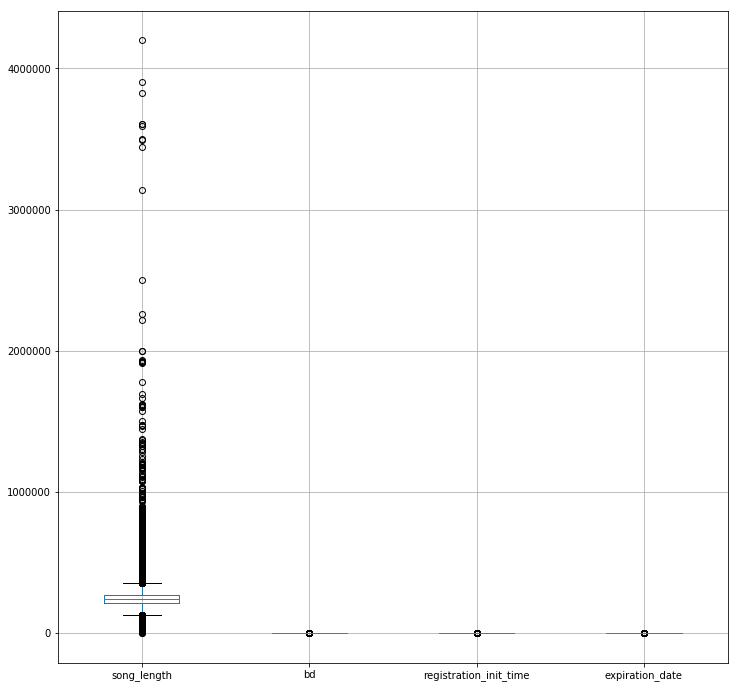

In [78]:
plt.figure(figsize=(12,12))
train.boxplot()

Observamos que hay dos valores que se encuentran solitarios en `song_length`, así que eliminaremos estos registros.

In [79]:
for i in range(0,10):
    train = train.drop(train.song_length.idxmax())

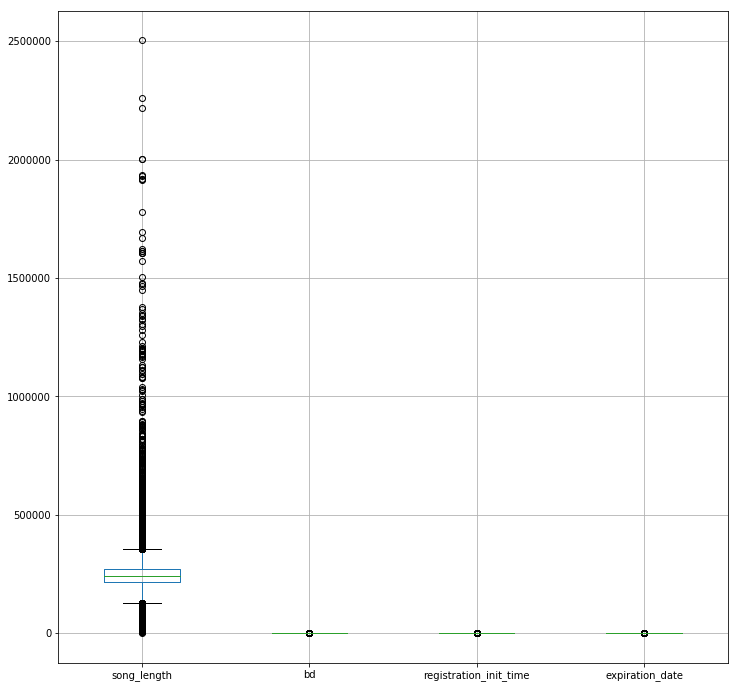

In [80]:
plt.figure(figsize=(12,12))
train.boxplot()

In [81]:
train.describe()

,song_length,bd,registration_init_time,expiration_date
count,1.376520e+05,137652.000000,137652.000000,137652.000000
mean,2.443090e+05,22.020973,2012.715907,2017.074143
std,5.854932e+04,10.519873,3.007760,0.390880
min,1.950000e+03,5.000000,2004.000000,2004.000000
25%,2.143660e+05,12.000000,2011.000000,2017.000000
50%,2.409565e+05,21.000000,2013.000000,2017.000000
75%,2.715950e+05,28.000000,2015.000000,2017.000000
max,2.503576e+06,87.000000,2017.000000,2020.000000


Continuamos con la tabla `test`

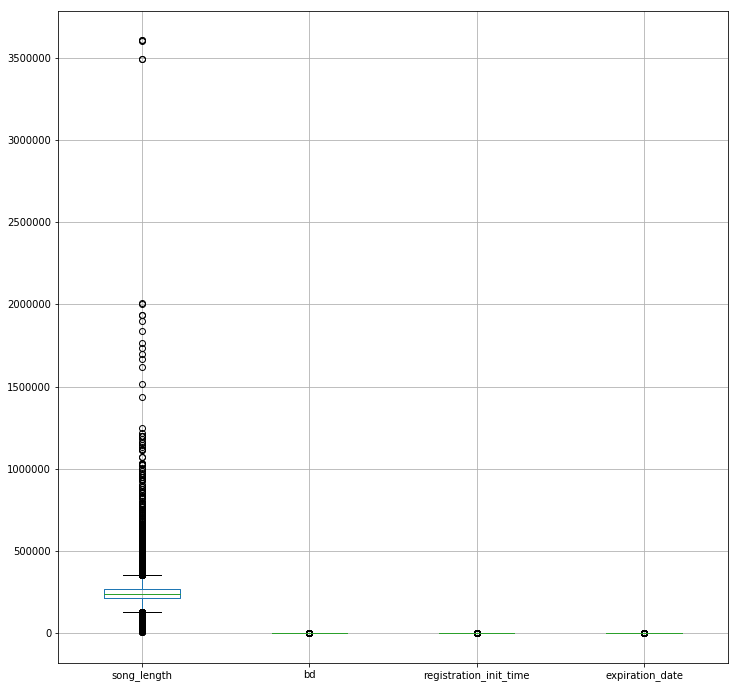

In [82]:
plt.figure(figsize=(12,12))
test.boxplot()

Observamos que hay dos valores que se encuentran solitarios en `song_length`, así que eliminaremos estos registros.

In [83]:
for i in range(0,6):
    test = test.drop(test.song_length.idxmax())

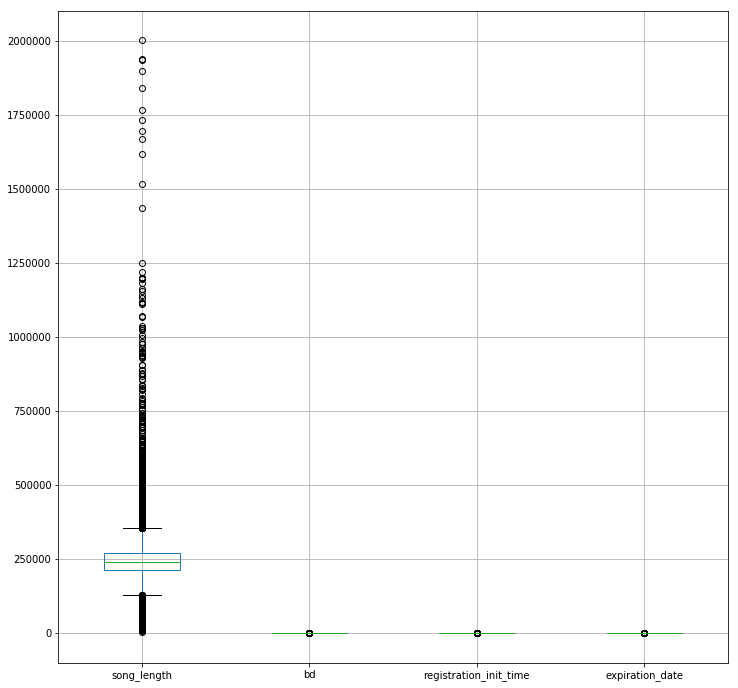

In [84]:
plt.figure(figsize=(12,12))
test.boxplot()

## Baseline.

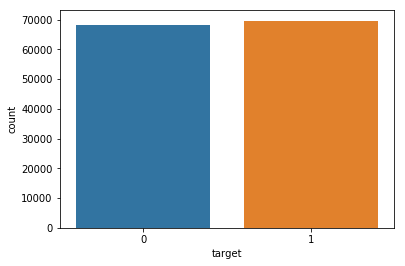

In [85]:
ax = sns.countplot(x="target", data=train)

In [86]:
train.target[train.target=="1"].aggregate('count')

69624

In [87]:
train.shape[0]

137652

In [88]:
train.target[train.target=="1"].aggregate('count') / train.shape[0] * 100

50.57972277918229

Tenemos que el baseline es un modelo que clasifica a todos los registros en "Volverá a escuchar una canción", con una exactitud de ***50,6%*** y que la variable objetivo ```target``` se encuentra bastante balanceada.

In [89]:
var_indep_cat = ['source_system_tab', 'source_screen_name', 'source_type', 'artist_name', 'name', 'gender', 'language', 'city', 'genre_ids', 'registered_via', 'target']

In [90]:
var_indep_num = ['song_length', 'bd', 'registration_init_time', 'expiration_date']

In [91]:
import warnings
import math
warnings.filterwarnings('ignore')

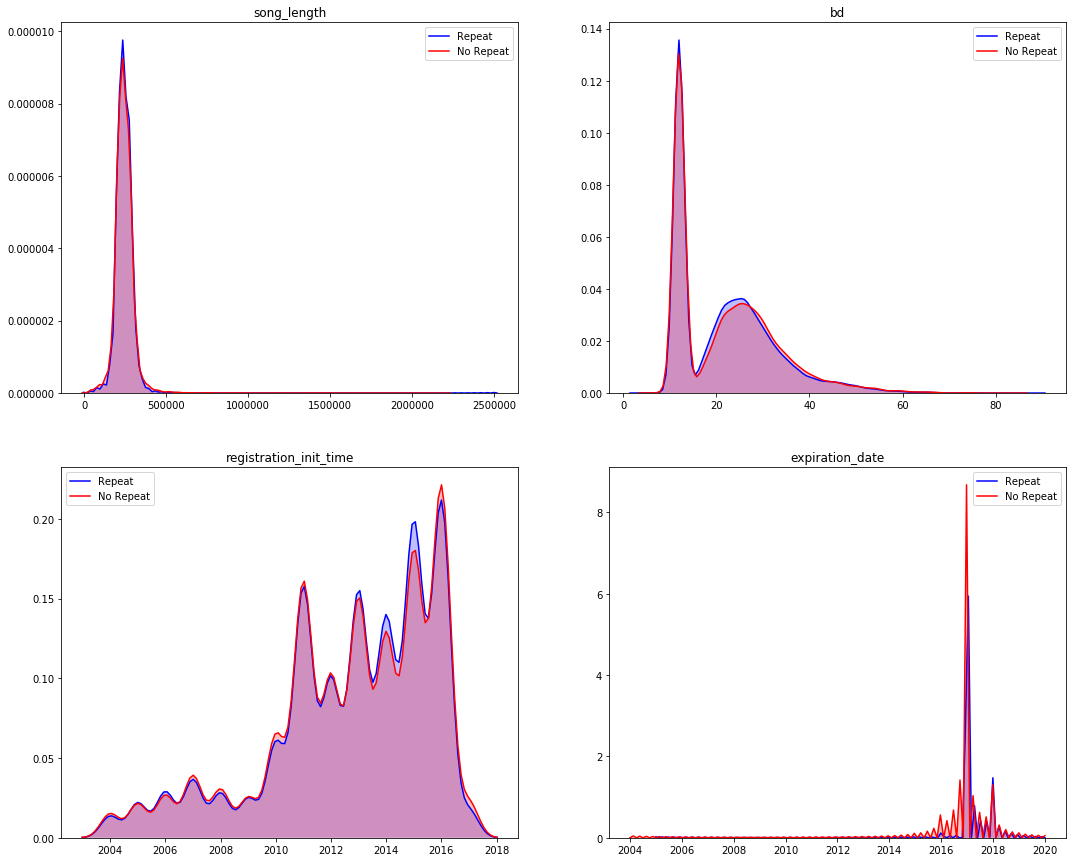

In [92]:
fig = plt.figure(figsize=(18,15))
i=1
for var_num in var_indep_num:
    ax = fig.add_subplot(math.ceil(len(var_indep_num)/2), 2, i)
    sns.kdeplot(train[train['target']=='1'][var_num], shade=True, color='b', ax=ax);
    sns.kdeplot(train[train['target']=='0'][var_num], shade=True, color='r', ax=ax);
    plt.title(var_num)
    plt.legend(['Repeat', 'No Repeat'])
    i+=1

Con estas gráficas univariadas se puede observar con más precisión lo balanceada que se encuentra la variable objetivo. A continuación se mostraran algunas gráficas bivariadas en donde se puede encontrar alguna relación entre las variables.

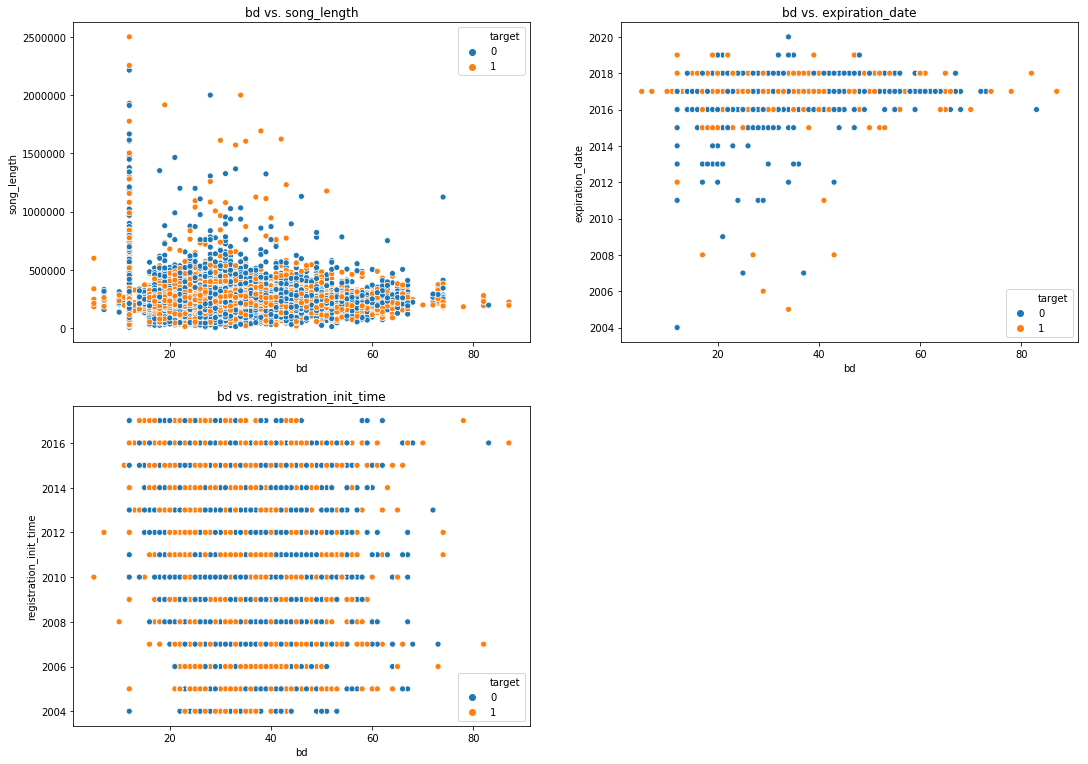

In [93]:
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(3, 2, 1)
sns.scatterplot(x="bd", y="song_length", hue="target", data=train, ax=ax)
plt.title("bd vs. song_length")
ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x="bd", y="expiration_date", hue="target", data=train, ax=ax)
plt.title("bd vs. expiration_date")
ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x="bd", y="registration_init_time", hue="target", data=train, ax=ax)
plt.title("bd vs. registration_init_time")
plt.show()

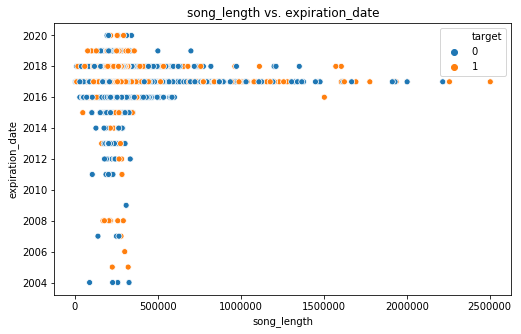

In [94]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(x="song_length", y="expiration_date", hue="target", data=train, ax=ax)
plt.title("song_length vs. expiration_date")
plt.show()

In [95]:
d2 = train[["song_length", "expiration_date", "target"]]
jitter = 0.3
d2.song_length = train.song_length + np.random.normal(scale=jitter, size=137652)
d2.expiration_date = train.expiration_date + np.random.normal(scale=jitter, size=137652)

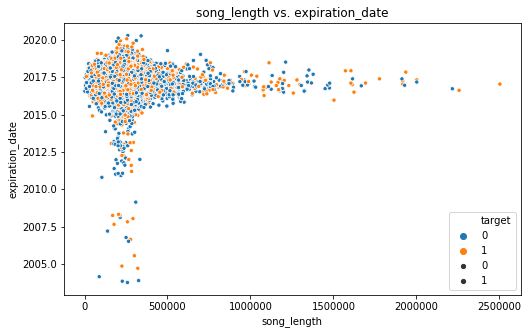

In [96]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(x="song_length", y="expiration_date", hue="target", data=d2, ax=ax, size=1)
plt.title("song_length vs. expiration_date")
plt.show()

## Normalización de los datos numéricos

### train

In [97]:
trainStd = pd.DataFrame(preprocessing.scale(train.loc[:, ['song_length', 'bd', 'registration_init_time',  'expiration_date']]))

In [98]:
trainStd.columns = train.columns[[3, 9, 12, 13]]

In [99]:
trainStd.mean(axis=0)

song_length              -1.960892e-16
bd                       -1.605497e-15
registration_init_time   -1.718944e-14
expiration_date          -2.114033e-13
dtype: float64

In [100]:
trainStd.std(axis=0)

song_length               1.000004
bd                        1.000004
registration_init_time    1.000004
expiration_date           1.000004
dtype: float64

### test

In [101]:
testStd = pd.DataFrame(preprocessing.scale(test.loc[:, ['song_length', 'bd', 'registration_init_time',  'expiration_date']]))

In [102]:
testStd.columns = test.columns[[3, 9, 12, 13]]

In [103]:
testStd.mean(axis=0)

song_length               3.273225e-17
bd                        4.644521e-16
registration_init_time    8.786530e-15
expiration_date           2.937931e-13
dtype: float64

In [104]:
testStd.std(axis=0)

song_length               1.000008
bd                        1.000008
registration_init_time    1.000008
expiration_date           1.000008
dtype: float64

## Reducción de dimensionalidad con PCA

Vamos a buscar una mejor representación de los datos que nos permita conservar la mayor cantidad de información a través de la transformación de las 4 variables originales en componentes principales reduciendo la dimensionalidad del problema actual.

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA()
pca.fit(trainStd.iloc[:, 0:4])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

 Tenemos 4 PCs, cada uno con las cargas (loadings) correspondientes a cada variable original.

In [107]:
pca.components_

array([[-0.00984116, -0.67836555,  0.65951016, -0.32368146],
       [ 0.99841372, -0.01810575,  0.02044053,  0.04923823],
       [ 0.05532782,  0.16116082, -0.29485985, -0.94022534],
       [ 0.00346698,  0.71660278,  0.69114847, -0.09371351]])

Tenemos la varianza explicada por cada eje en las unidades originales

In [108]:
pca.explained_variance_

array([1.49704414, 1.0001317 , 0.94549829, 0.55735493])

 Tenemos la proporción de la varianza explicada por cada eje, en porcentaje.

In [109]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.37425832, 0.25003111, 0.23637285, 0.13933772])

Ahora realizaremos la transformación de la dimensión origial a las dimensiones del espacio de componentes principales.

In [110]:
dataPca = pca.transform(trainStd.iloc[:, 0:4])

Veamos gráficamente la cantidad de información correspondiente a cada componente principal:

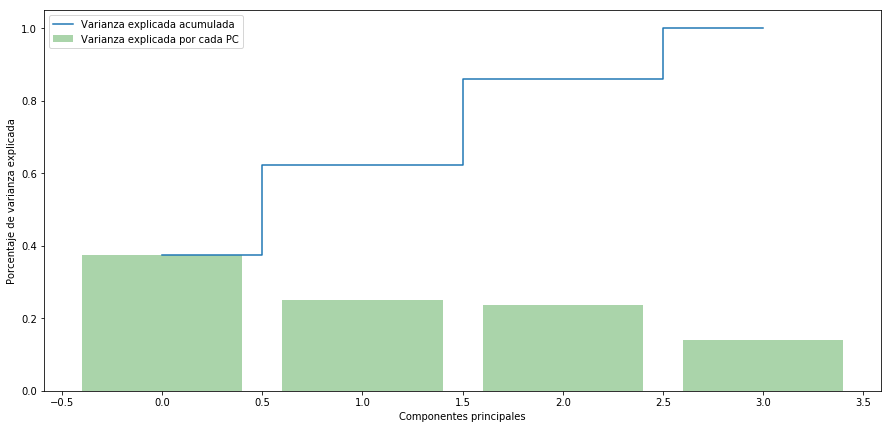

In [111]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [112]:
np.sum(pca.explained_variance_ratio_[0:3])

0.8606622801344074

Encontramos que los primeros 3 componentes conservan el 86.06% de la información original.

In [113]:
dataPca = dataPca[:,0:3]

In [114]:
dataPca[0:5]

array([[-1.4005921 ,  0.20660765, -1.9918846 ],
       [ 1.42441612,  0.36321209, -0.2786706 ],
       [ 0.10308345,  2.22047964,  0.27363211],
       [-0.82766749, -0.20778313,  0.45920886],
       [-0.49030275, -0.53093364, -2.24856721]])

Vamos a ver los puntos en el nuevo sistema de representación dado por los componentes principales. Esto nos permitirá entender mejor la relación entre componentes principales y variables originales.

In [115]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid()

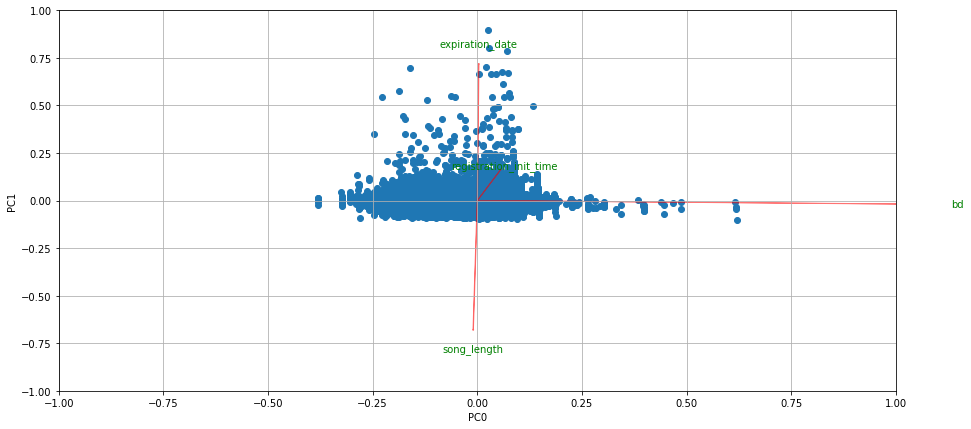

In [116]:
biplot(dataPca, pca.components_, 0, 1, ['song_length', 'bd', 'registration_init_time', 'expiration_date'])

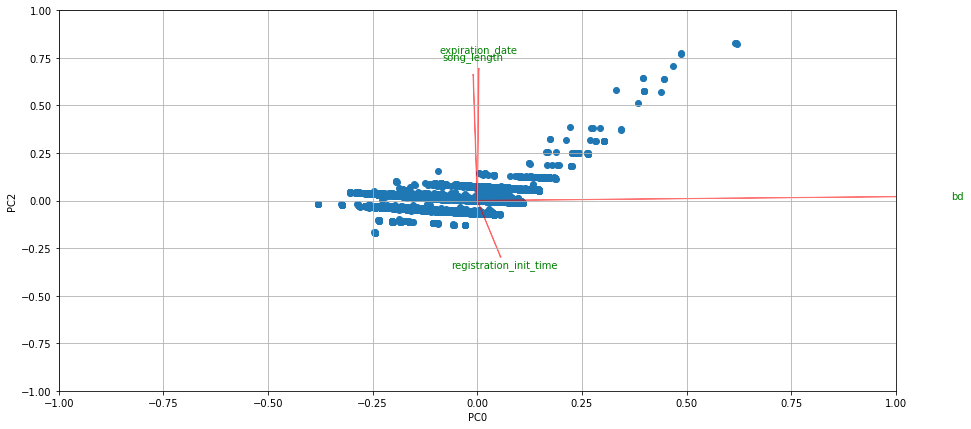

In [117]:
biplot(dataPca, pca.components_, 0, 2, ['song_length', 'bd', 'registration_init_time', 'expiration_date'])

In [118]:
trainStd.columns[0:4]

Index(['song_length', 'bd', 'registration_init_time', 'expiration_date'], dtype='object')

In [119]:
pca.components_

array([[-0.00984116, -0.67836555,  0.65951016, -0.32368146],
       [ 0.99841372, -0.01810575,  0.02044053,  0.04923823],
       [ 0.05532782,  0.16116082, -0.29485985, -0.94022534],
       [ 0.00346698,  0.71660278,  0.69114847, -0.09371351]])

In [120]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC1', 'PC2', 'PC3']

## Aplicación de clustering

In [121]:
from sklearn.cluster import KMeans
from collections import Counter

### Con k = 3

In [122]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [123]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 82904, 1: 40603, 2: 14145})


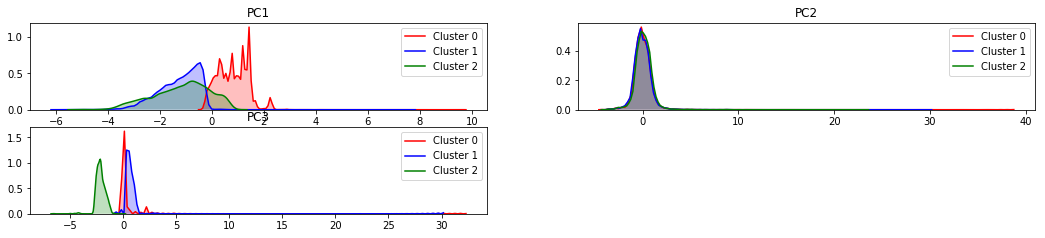

In [124]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Con k = 3 podemos observar que se pueden separar bien los untos el cluster 0 (rojo) en el PC1 y los puntos del cluster 2 (verde) y un poco del 1 (azul) en el PC3.

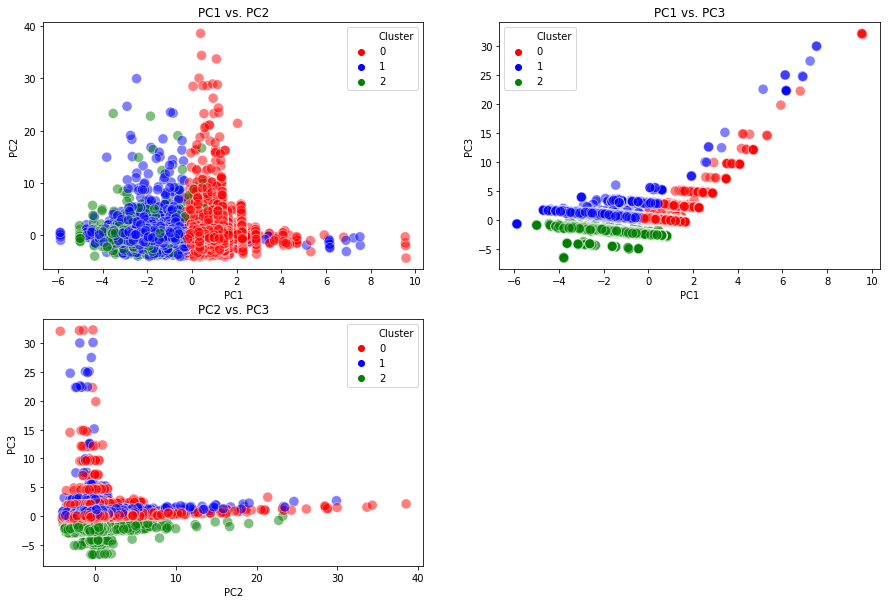

In [125]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

Con PC1 vs PC3 se pueden separar bien los 3 clusters.

### Con k = 4

In [126]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [127]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 51418, 3: 39731, 2: 32378, 0: 14125})


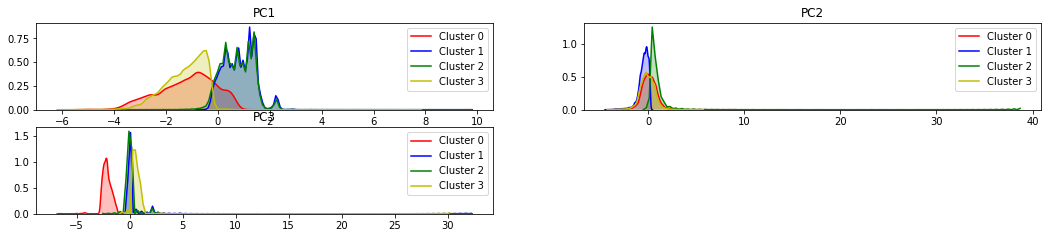

In [128]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==3][var], shade=True, color='y', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    i+=1

Con PC1 podemos separar bien los puntos de el clusters 1 (azul). Con el PC3 podemos separar buen los puntos de los clusters 0 (rojo) y 3 (amarillo).

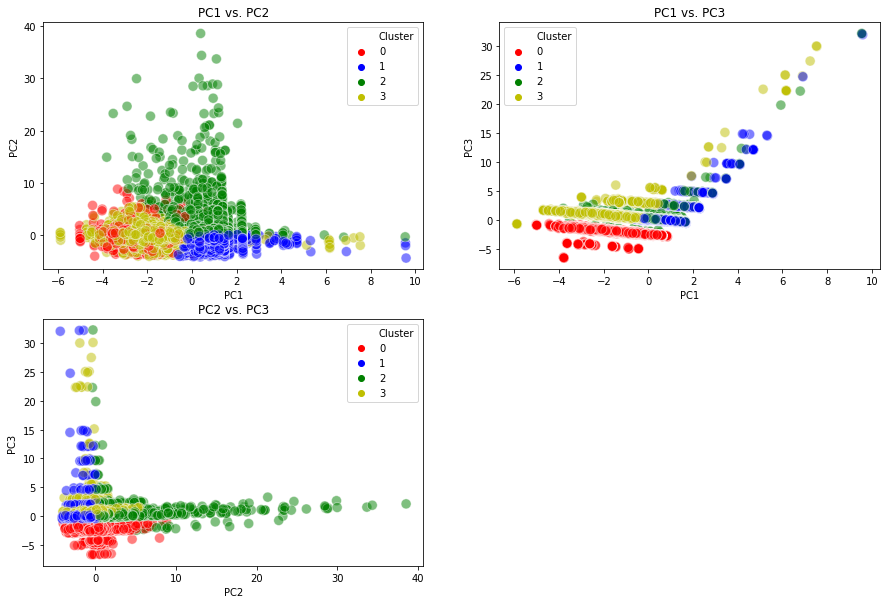

In [129]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g", "y"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

Con PC1 VS PC2 se puede separar bien los clusters 1 y 2; con PC1 vs PC3 se pueden separar bien los clusters 0, 1 y 3; con PC2 vs PC3 también se podrían separar los clusters 0 y 2

### Con k = 2

In [130]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [131]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 96765, 1: 40887})


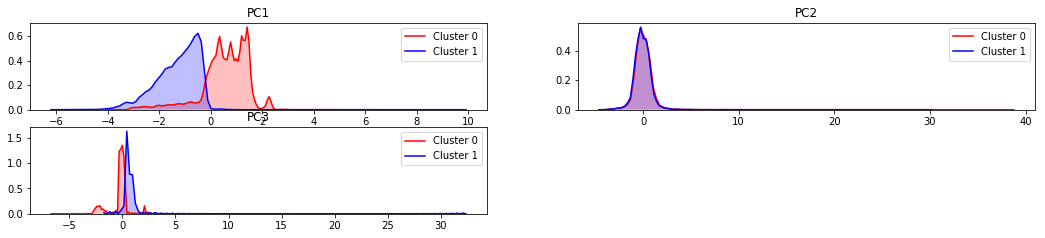

In [132]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1'])
    i+=1

Con k = 2, en PC1 y PC3 se pueden separar los dos clusters de buena manera.

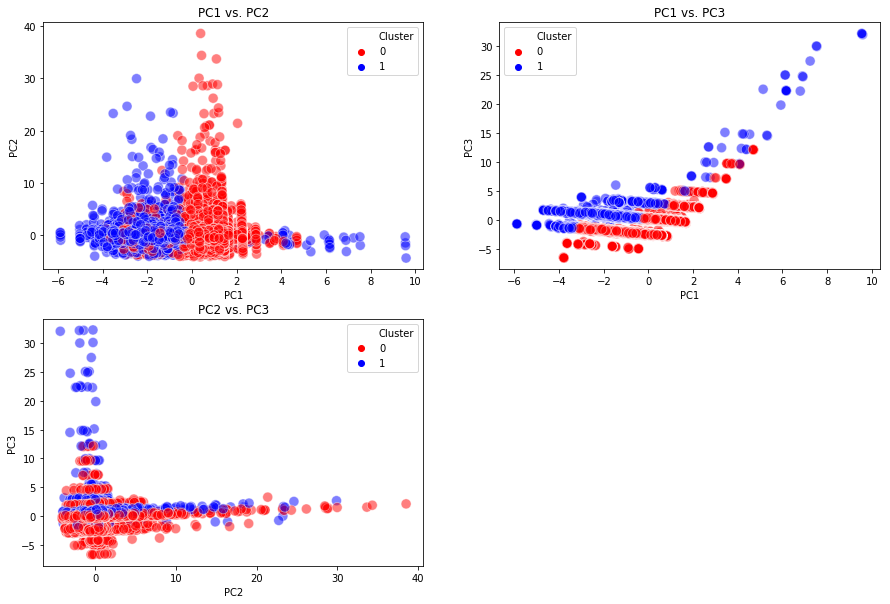

In [133]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

Con PC1 vs PC2 y PC2 vs PC3 se pueden seprar de buena manera los dos clusters.

## Busqueda del k óptimo

In [134]:
kmeans.inertia_

401434.4774769791

In [135]:
kmeans.init

'k-means++'

In [136]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(trainStd)
    WSSs.append(km.inertia_)
WSSs

[550608.0000000001,
 406628.40416954516,
 330904.9329507287,
 293893.323345224,
 262720.97428014275,
 235241.6176596832,
 208224.45930321896,
 193509.1909190788,
 179047.4868906377,
 167007.99210836834,
 155479.87339370794,
 144583.77791319345,
 133350.99082965995,
 124940.15237646548]

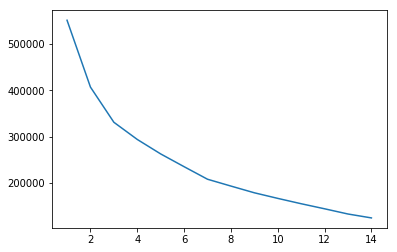

In [137]:
plt.plot(range(1, 15), WSSs)

Podemos observar que el codo se encuentra aproximadamente en k=3, por lo cuál este será nuestro k óptimo que fué el primer clustering que realizamos.

## Clusters categoricos

In [138]:
data = train.loc[:,['language', 'city', 'gender', 'name']]

In [139]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23917, cost: 253480.0
Run 1, iteration: 2/100, moves: 0, cost: 253480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29746, cost: 248314.0
Run 2, iteration: 2/100, moves: 0, cost: 248314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10931, cost: 276541.0
Run 3, iteration: 2/100, moves: 0, cost: 276541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 44071, cost: 255455.0
Run 4, iteration: 2/100, moves: 18450, cost: 252786.0
Run 4, iteration: 3/100, moves: 2553, cost: 252786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 30080, cost: 272656.0
Run 5, iteration: 2/100, moves: 4, cost: 272656.0
Best run was number 2


Se presentan los centroides de los clusters realizados por kmodes

In [140]:
print(km.cluster_centroids_)

[['3.0' '13.0' 'male' 'Stay With Me']
 ['3.0' '1.0' 'male' '演員']
 ['3.0' '5.0' 'female' '演員']
 ['52.0' '1.0' 'male' 'Faded']]


## Aplicación de modelos predictivos

### Aplicación de valores dummies con un encoding one hot

In [141]:
var_indep_cat = ["source_system_tab", "source_screen_name", "source_type", "genre_ids", "language", "city", "gender", "registered_via"]
var_indep_num = ["song_length", "bd", "registration_init_time", "expiration_date"]

In [142]:
# dummies para train
data_cat_one_hot = pd.get_dummies(train[var_indep_cat], prefix=var_indep_cat)
X = train[var_indep_num].join(data_cat_one_hot)
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [143]:
# dummies para test
#data_cat_one_hot = pd.get_dummies(test[var_indep_cat], prefix=var_indep_cat)
#xTest = test[var_indep_num].join(data_cat_one_hot)
#xTest.shape

### Modelo 1: Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
rforest = RandomForestClassifier(n_estimators=200,     #Número de modelos a crear 
                                criterion='entropy', # el criterio de particionamiento de un conjunto de datos
                                max_depth=15,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                                min_samples_split=1000, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
                                min_samples_leaf=5,  # prepoda: el mínimo número de registros en una hoja
                                max_features=('auto'), # Número o % de atributos de la muestra de aprendizaje
                                max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
                                min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
                                bootstrap=True,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                                oob_score=True,     # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                                n_jobs=2,            # Número de cores a utilizar
                                random_state=None,   # random seed para el generador aleatorio
                                verbose=0)           # controla la cantidad de información a reportar
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud     : ", metrics.accuracy_score(y_test, y_pred))
print("Kappa         : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, "LEAVE", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, "LEAVE", average='macro'))
print("F1-score      : ", metrics.f1_score(y_test, y_pred, "LEAVE", average='macro'))

Exactitud     :  0.6261865555986051
Kappa         :  0.2525894665575903
Precisión     :  0.41762873400235123
Recall        :  0.4175621765464112
F1-score      :  0.4174327755148117


In [145]:
rforest.oob_score_

0.6281186433641911

Encontramos que las variables en orden de importancia son:

In [146]:
X.columns[np.argsort(-rforest.feature_importances_)]

Index(['source_screen_name_Local playlist more',
       'source_system_tab_my library', 'source_type_radio',
       'source_type_local-library', 'source_screen_name_Radio',
       'source_system_tab_radio', 'source_system_tab_discover',
       'source_type_local-playlist', 'source_type_online-playlist',
       'source_screen_name_Online playlist more',
       ...
       'genre_ids_242|786', 'genre_ids_242|947', 'genre_ids_275|1572|359',
       'genre_ids_352', 'genre_ids_352|275|1995|1572', 'genre_ids_374',
       'genre_ids_381|2086', 'genre_ids_381|2086|374', 'genre_ids_2194',
       'genre_ids_388|2122'],
      dtype='object', length=347)

### Modelo 2: Regresión logística

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report

In [148]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.626356063541263 , Kappa: 0.2524340491088869 

             precision    recall  f1-score   support

          0       0.63      0.61      0.62     20447
          1       0.63      0.64      0.64     20849

avg / total       0.63      0.63      0.63     41296



### Modelo 3: Red Neuronal

In [166]:
mlp = MLPClassifier(hidden_layer_sizes=(12,25,2))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 25, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [167]:
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6249515691592405 , Kappa: 0.24914594566952664 

             precision    recall  f1-score   support

          0       0.63      0.57      0.60     20447
          1       0.62      0.68      0.65     20849

avg / total       0.63      0.62      0.62     41296



## Comparación de los modelos

Los tres modelos tienen una precisión muy parecida, pero entre los tres el que tuvo una leve mejoría frente a los demás es el de regresión logística quien sacó un 63% de exactitud en sus predicciones. Además, entre los tres modelos el más rápido se ejecutó fue el de regresión logística. Por lo tanto, si tuvieramos que escoger uno de los modelos, sería el de regresión logística.


## Conclusiones

Teniendo en cuenta lo dicho anteriormente, al momento de escoger uno de los modelos, se escogería el de regresión logística ya que presenta unas mejoras métricas y mejora en casi un 26% la predicción respecto al baseline. Aunque no se incluyeron las variables `artist_name` y `name` que pueden llegar a representar gran información a la hora de realizar las predcciones con cualquiera de los modelos escogidos , la exactitud de los modelos fue relativamente buena.

Con los clusters se pudo observar los grupos o los patrones que se pueden formar a partir de la información partiendo de los centroides de cada uno de los clusters.


## Acciones a tomar

Al dejar por fuera dos variables categóricas como lo son el nombre del artista y el nombre de la canción que pueden llegar a ser muy importantes a la hora de realizar las predicciones se puede llegar a resultados no esperados o con una confiabilidad muy baja. Por lo tanto el siguiente paso es buscar estrategias para poder darle tratamiento a estas variables sin afectar la memoria del computador y poder incluirlas dentro de los modelos predictivos. Entre los procedimientos de encoding que se podría utilizar son vecindades basadas Top-N collaborative filtering (CF) y modelos basados en la factorización de matrices (MF)